### Estimate average velocity from displacement time-series

Given the displacement time-series in meters $d^i, i=1,...,N$, with $d^i = -\frac{\lambda}{4\pi}\phi_{dis}^i$, the average velocity is estimated as:

$d^i = vt_i + c, i=1,...,N$

The standard deviation of the estimated velocity is given by equation (10) in Fattahi and Amelung (2015, JGR) as:

$\sigma_v = \sqrt{\frac{\sum_{i=1}^N (d_i - \hat d_i)^2}{(N-2)\sum_{i=1}^N (t_i - \bar t)^2}}$

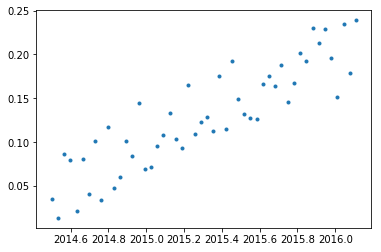

Displacement [m]: [0.03562297 0.01351408 0.08696832 0.07956964 0.02141132 0.08044473
 0.04055869 0.10107175 0.03368765 0.11674035 0.04740458 0.05999524
 0.1010989  0.08396353 0.1448416  0.06930142 0.07170124 0.09590754
 0.10849641 0.13285217 0.10330419 0.0928405  0.16549559 0.10966479
 0.12245642 0.12872354 0.11298229 0.17564052 0.11449719 0.19254139
 0.14921557 0.1326082  0.12795384 0.12652519 0.16637857 0.1754274
 0.16447998 0.18809972 0.14529299 0.16792766 0.2015142  0.19214585
 0.23063884 0.21363882 0.22869366 0.19569314 0.15143376 0.23438869
 0.17933493 0.2390432 ]
Dates [year]: [2014.5        2014.53285421 2014.56570842 2014.59856263 2014.63141684
 2014.66427105 2014.69712526 2014.72997947 2014.76283368 2014.79568789
 2014.82854209 2014.8613963  2014.89425051 2014.92710472 2014.95995893
 2014.99281314 2015.02566735 2015.05852156 2015.09137577 2015.12422998
 2015.15708419 2015.1899384  2015.22279261 2015.25564682 2015.28850103
 2015.32135524 2015.35420945 2015.38706366 2015.419917

In [3]:
import os
import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt

## simulate displacement time-series and dates
vel_sim = 0.1 #m/year
num_date = 50
t_year = np.arange(num_date) * 12 / 365.25 + 2014.5
dis_sim = (t_year - t_year[0]) * vel_sim + np.random.rand(num_date) * 0.1

# plot
plt.figure()
plt.plot(t_year, dis_sim, '.')
plt.show()
print('Displacement [m]:', dis_sim)
print('Dates [year]:', t_year)
print('True velocity [m/year]:', vel_sim)

In [4]:
## least squares solution
# option 1 - scipy.linalg module
t = t_year - t_year[0]     # option 1 [recommend]: set the first date as zero to avoid float32 precision over tolerance for the interception at the first date
#t = t_year                 # option 2 also works in Alfredo's data
A = np.ones((num_date, 2), dtype=np.float32)
A[:, 0] = t
vel_est, c = np.dot(np.linalg.pinv(A), dis_sim)
dis_est = t * vel_est + c
vel_std = np.sqrt(np.sum(np.square(dis_sim - dis_est)) / (np.sum(np.square(t - np.mean(t)))) / (num_date - 2))
print('Estimation using scipy.linalg with velocity [m/year]: {:.2f}, velocity std [m/year]: {:.2f}'.format(vel_est, vel_std))

## option 2 - scipy.stats.linregress()
vfit = stats.linregress(t, dis_sim)
vel_est, velstd = vfit[0], vfit[4]
print('Estimation using scipy.stats  with velocity [m/year]: {:.2f}, velocity std [m/year]: {:.2f}'.format(vel_est, vel_std))
print(vfit)

Estimation using scipy.linalg with velocity [m/year]: 0.11, velocity std [m/year]: 0.01
Estimation using scipy.stats  with velocity [m/year]: 0.11, velocity std [m/year]: 0.01
LinregressResult(slope=0.10881224944265631, intercept=0.04148861462077964, rvalue=0.8868936669328349, pvalue=1.0244329890804742e-17, stderr=0.008180932149991549)


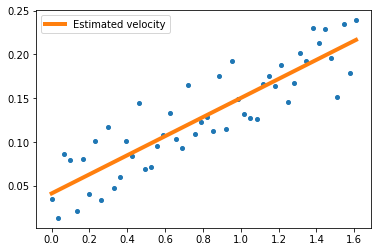

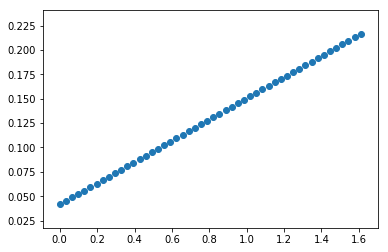

In [7]:
# plot
plt.figure()
plt.plot(t, dis_sim, '.', ms=8)
plt.plot(t, dis_est, '-', lw=4, label='Estimated velocity')
plt.legend()
plt.show()
plt.scatter(t,dis_est)